In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('./train_V2.csv')

In [4]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.00,0,0.00,0,0,244.80,1,1466,0.44
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.00,0,11.04,0,0,1434.00,5,0,0.64
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.00,0,0.00,0,0,161.80,2,0,0.78
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.00,0,0.00,0,0,202.70,3,0,0.17
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.00,0,0.00,0,0,49.75,2,0,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.00,0,0.00,0,0,1019.00,3,1507,0.18
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.00,0,0.00,0,0,81.70,6,0,0.29
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.00,0,2.18,0,0,788.70,4,0,0.48
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.00,0,0.00,0,0,2748.00,8,0,0.80


In [5]:
df.shape

(4446966, 29)

In [6]:
# 1 null value in dataset

df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
# Null value in dataset
# We will need to handle null values especially in the winPlacePerc. We can replace NaN with 0 or last place
# Assuming player DC'ed in session or didn't complete session

df[df.isnull().any(axis=1)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.00,0,0,0,1,0,0,0,0.00,9,solo-fpp,1,1,1574,0,0.00,0,0.00,0,0,0.00,0,0,NaN


In [60]:
df.matchId.unique().shape

(47965,)

In [8]:
df.describe().T.sort_values('std')

,count,mean,std,min,25%,50%,75%,max
roadKills,4446966.00,0.00,0.07,0.00,0.00,0.00,0.00,18.00
vehicleDestroys,4446966.00,0.01,0.09,0.00,0.00,0.00,0.00,5.00
teamKills,4446966.00,0.02,0.17,0.00,0.00,0.00,0.00,12.00
winPlacePerc,4446965.00,0.47,0.31,0.00,0.20,0.46,0.74,1.00
revives,4446966.00,0.16,0.47,0.00,0.00,0.00,0.00,39.00
assists,4446966.00,0.23,0.59,0.00,0.00,0.00,0.00,22.00
headshotKills,4446966.00,0.23,0.60,0.00,0.00,0.00,0.00,64.00
killStreaks,4446966.00,0.54,0.71,0.00,0.00,0.00,1.00,20.00
DBNOs,4446966.00,0.66,1.15,0.00,0.00,0.00,1.00,53.00
kills,4446966.00,0.92,1.56,0.00,0.00,0.00,1.00,72.00


In [9]:
df.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [10]:
df.matchType.value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [11]:
# dropping null value since it is only one row

df_new = df.dropna()

In [12]:
df_new.shape

(4446965, 29)

In [13]:
print("The average person kills {:.4f} players, 1% of people have {} kills or more, while the most kills ever recorded is {}.".format(df_new['kills'].mean(),df_new['kills'].quantile(0.99), df_new['kills'].max()))

The average person kills 0.9248 players, 1% of people have 7.0 kills or more, while the most kills ever recorded is 72.


In [14]:
print("The average person makes {:.4f} damage, 1% of people have {} damage or more, while the most damage ever recorded is {}.".format(df_new['damageDealt'].mean(),df_new['damageDealt'].quantile(0.99), df_new['damageDealt'].max()))

The average person makes 130.7172 damage, 1% of people have 776.2 damage or more, while the most damage ever recorded is 6616.0.


/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


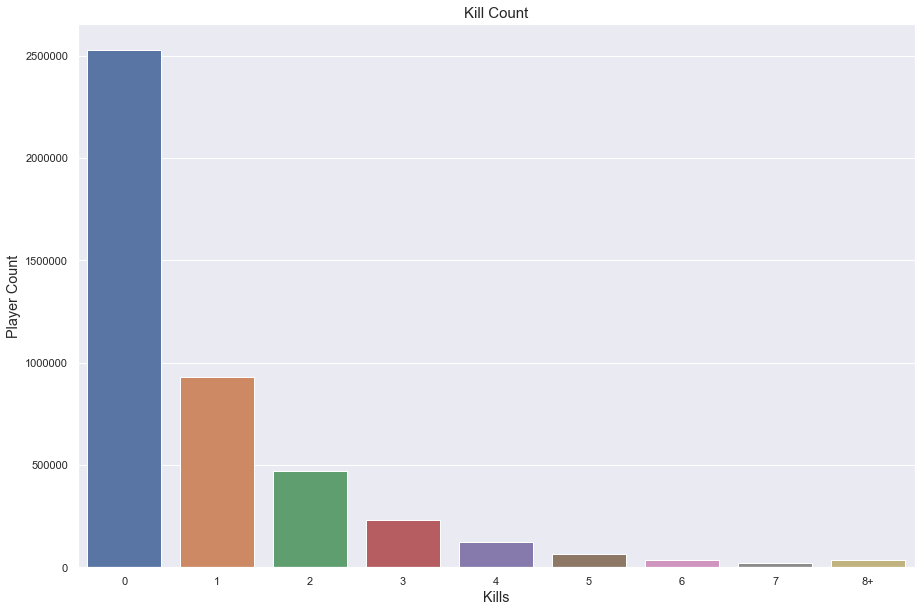

In [62]:
data = df_new.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.xlabel('Kills', fontsize='large')
plt.ylabel('Player Count', fontsize='large')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('kill_distribution.png')
plt.show()

In [16]:
print('Not a lot of players get kills and very few get 5+ kills. As mentioned earlier, 1% of players get 7 kills or more.')

Not a lot of players get kills and very few get 5+ kills. As mentioned earlier, 1% of players get 7 kills or more.


/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


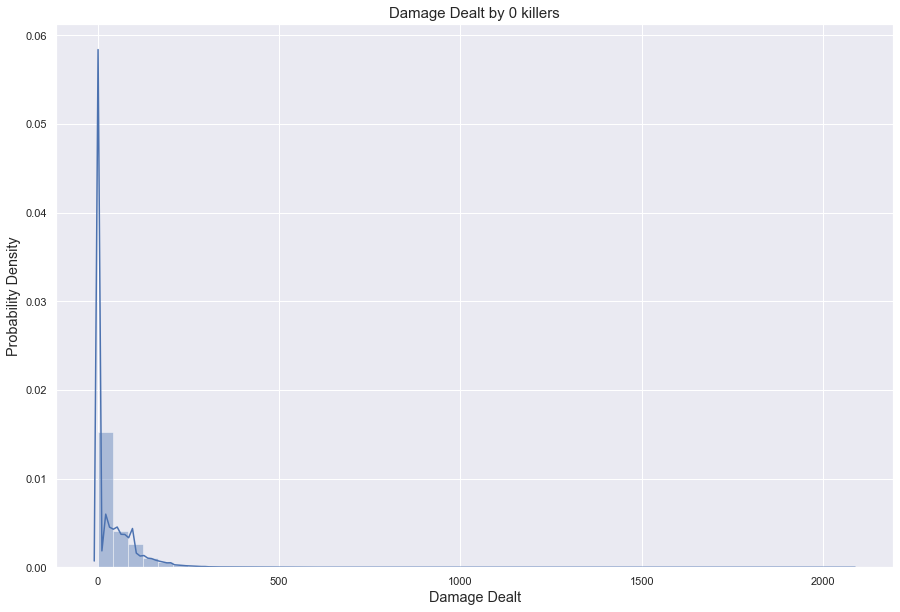

In [63]:
data = df_new.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.xlabel('Damage Dealt', fontsize='large')
plt.ylabel('Probability Density', fontsize='large')
plt.savefig('0_kills.png')
plt.show()

In [18]:
print('Not a lot deal damage from players with no kills. Either they get eliminated quickly in matches or just cant aim accurately. I will look into resources used vs others as a follow up')

Not a lot deal damage from players with no kills. Either they get eliminated quickly in matches or just cant aim accurately. I will look into resources used vs others as a follow up


In [19]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(df_new)))

data_0 = df_new[df_new['damageDealt'] == 0].copy()
print("{} players ({:.4f}%) have won without dealing damage!".format(len(data_0[data_0['winPlacePerc']==1]), 100*len(data_0[data_0['winPlacePerc']==1])/len(df_new)))

16666 players (0.3748%) have won without a single kill!
4770 players (0.1073%) have won without dealing damage!


In [20]:
print('Less than 1% of players have won without a single kill or won without dealing damage. Dealing damage and getting kills seems slightly correlated to winning')

Less than 1% of players have won without a single kill or won without dealing damage. Dealing damage and getting kills seems slightly correlated to winning


/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


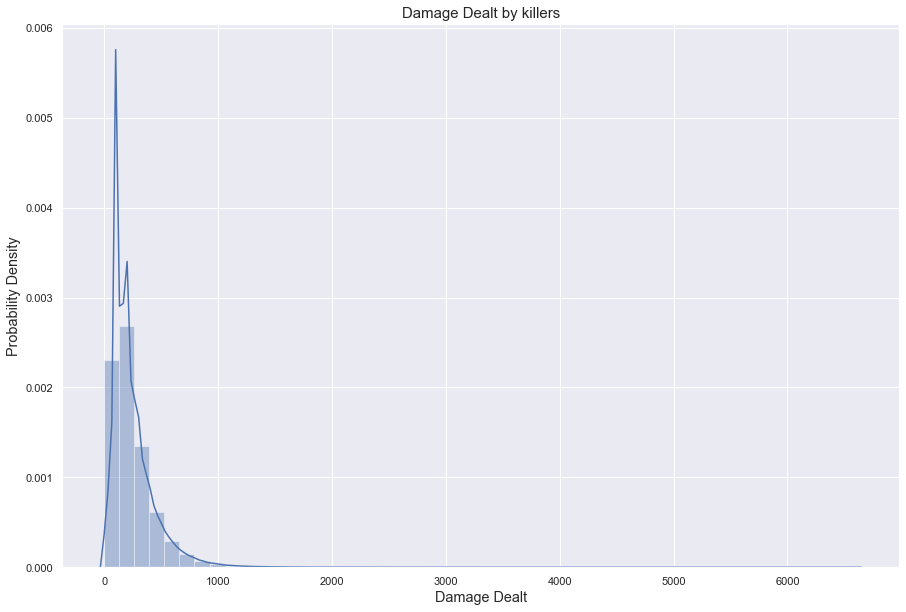

In [64]:
data = df_new.copy()
data = data[data['kills']>=1]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.xlabel('Damage Dealt', fontsize='large')
plt.ylabel('Probability Density', fontsize='large')
plt.savefig('1+_kills.png')
plt.show()

In [22]:
print('Players with kills do more damage vs. players without kills as observed in the distplot comparing both segments')

Players with kills do more damage vs. players without kills as observed in the distplot comparing both segments


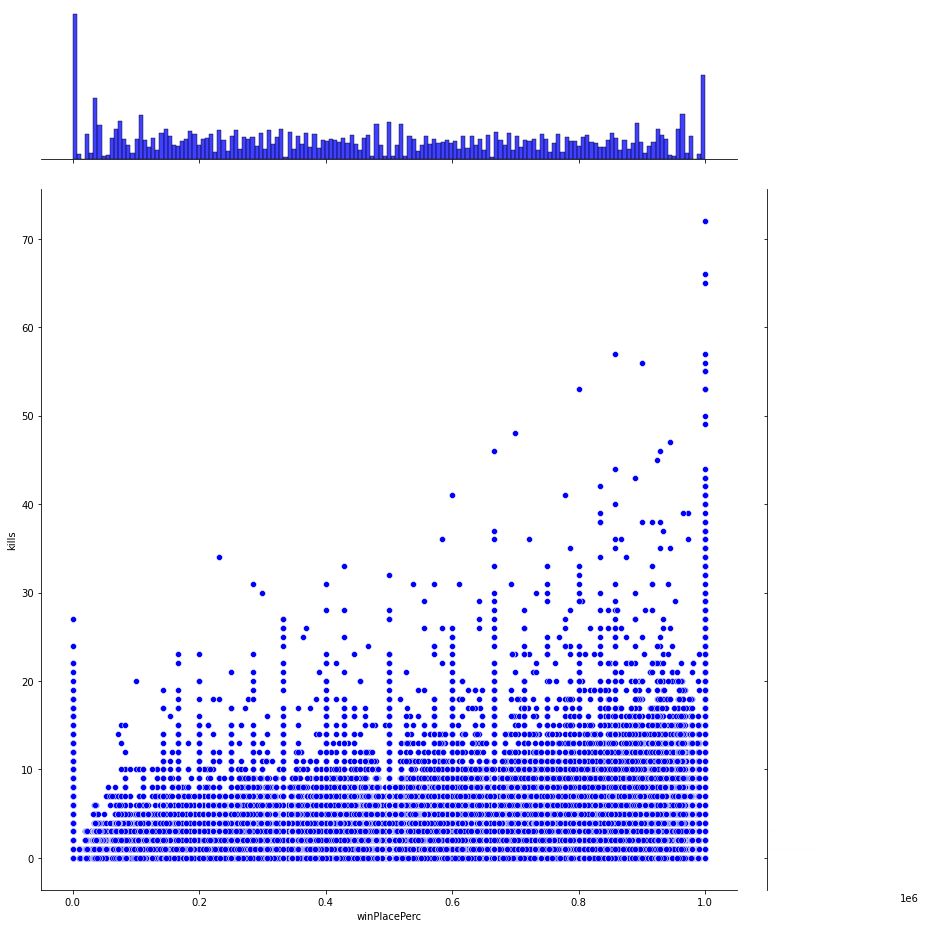

In [23]:
sns.jointplot(x="winPlacePerc", y="kills", data=df_new, height=13, ratio=4, color="b")
plt.show()

In [24]:
print('correlation between kills and placement, duh. The higher the kills, the more likely a player wins or place high in a session')

correlation between kills and placement, duh. The higher the kills, the more likely a player wins or place high in a session


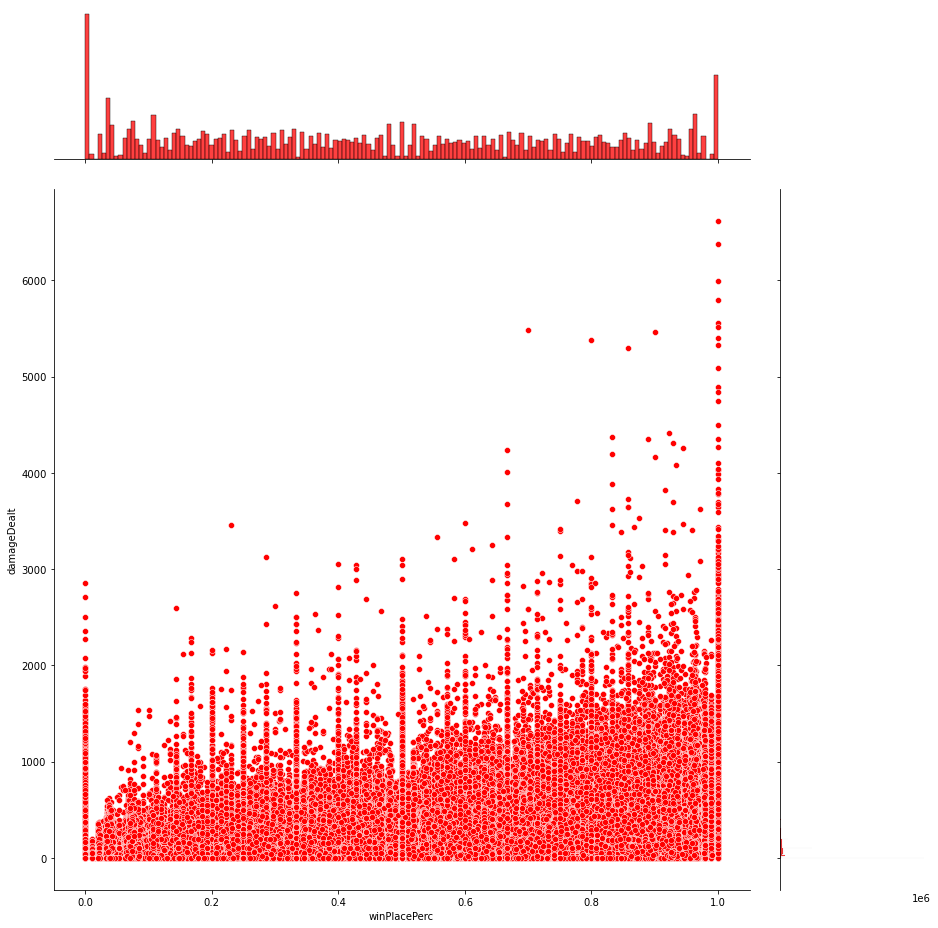

In [25]:
sns.jointplot(x="winPlacePerc", y="damageDealt", data=df_new, height=13, ratio=4, color="r")
plt.show()

In [26]:
print('correlation between damage and placement similar to kills and placement.')

correlation between damage and placement similar to kills and placement.


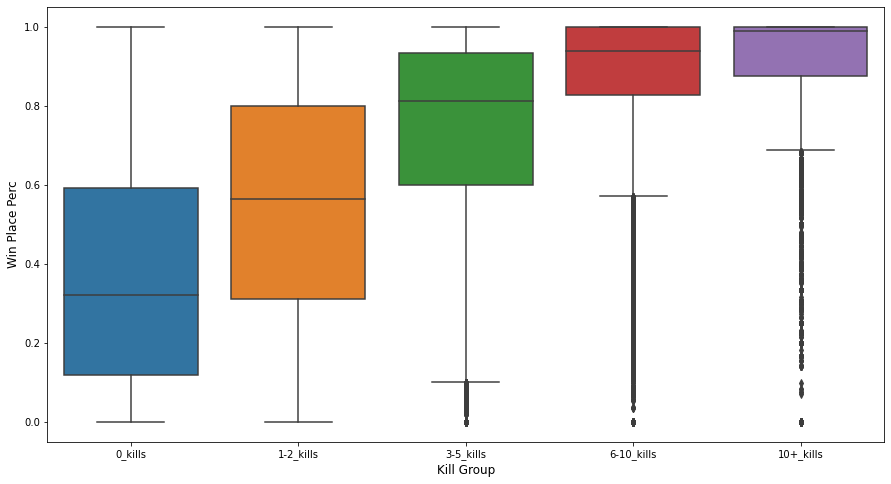

In [27]:
kills = df_new.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 100], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.xlabel('Kill Group', fontsize='large')
plt.ylabel('Win Place Perc', fontsize='large')
plt.show()

In [28]:
print('The box plots further highlights the relationship between Kills and placement. The more kills, the higher a players placement')

The box plots further highlights the relationship between Kills and placement. The more kills, the higher a players placement


In [29]:
print("The average person walks {:.1f}m, 1% of people have walked {}m or more, while the most distance ever recorded is {}m.".format(df_new['walkDistance'].mean(),df_new['walkDistance'].quantile(0.99), df_new['walkDistance'].max()))

The average person walks 1154.2m, 1% of people have walked 4396.0m or more, while the most distance ever recorded is 25780.0m.


/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


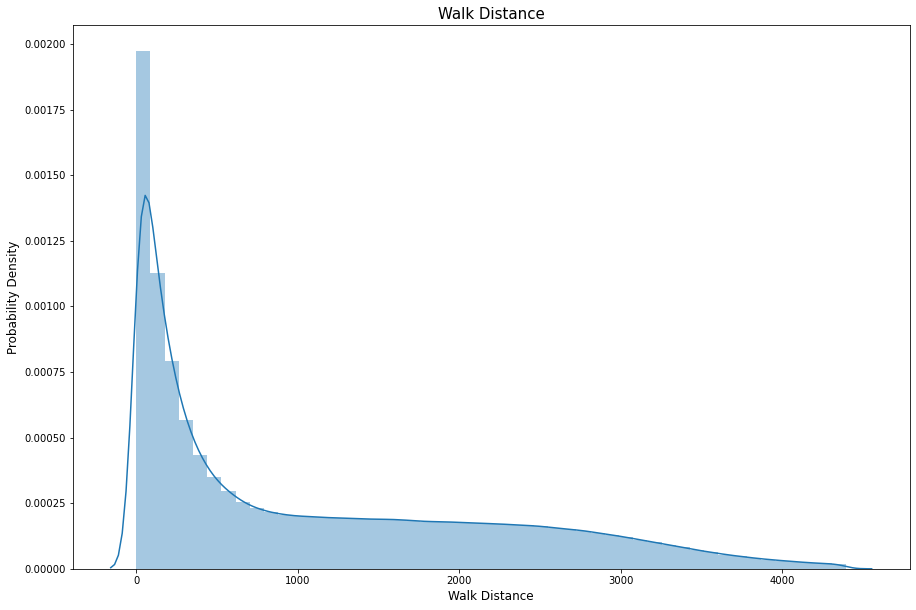

In [30]:
data = df_new.copy()
data = data[data['walkDistance'] < data['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walk Distance",fontsize=15)
sns.distplot(data['walkDistance'])
plt.xlabel('Walk Distance', fontsize='large')
plt.ylabel('Probability Density', fontsize='large')
plt.show()

In [31]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a step or they were afk and eliminated by other players.".format(len(data[data['walkDistance'] == 0]), 100*len(data[data['walkDistance']==0])/len(data)))

99602 players (2.2624%) walked 0 meters. This means that they die before even taking a step or they were afk and eliminated by other players.


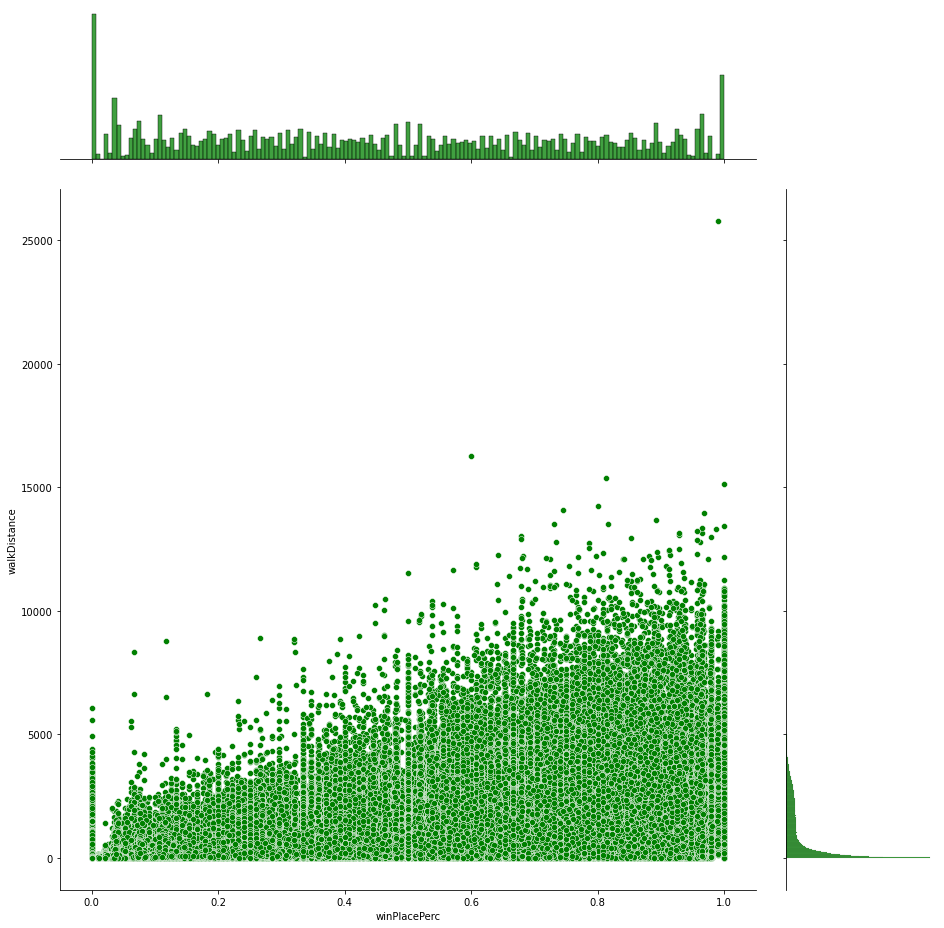

In [32]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=df_new, height=13, ratio=4, color="g")
plt.show()

In [33]:
print('Correlation between distance walked win place. The more distance covered increase survivability')

Correlation between distance walked win place. The more distance covered increase survivability


In [34]:
print("The average person rode {:.1f}m, 1% of people rode {}m or more, while the most distance ever ridden was {}m.".format(df_new['rideDistance'].mean(),df_new['rideDistance'].quantile(0.99), df_new['rideDistance'].max()))

The average person rode 606.1m, 1% of people rode 6966.0m or more, while the most distance ever ridden was 40710.0m.


/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


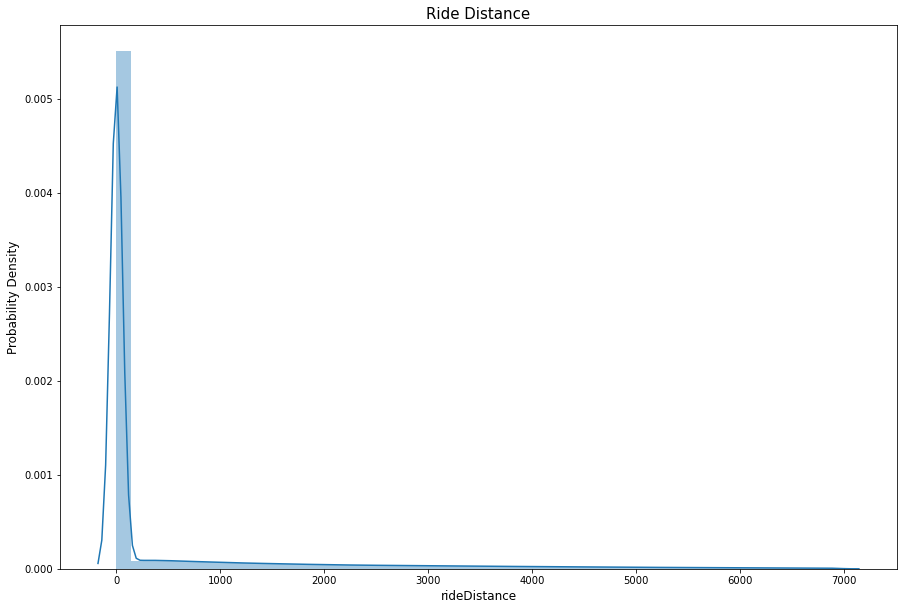

In [35]:
data = df_new.copy()
data = data[data['rideDistance'] < data['rideDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance",fontsize=15)
plt.xlabel('Ride Distance', fontsize='large')
plt.ylabel('Probability Density', fontsize='large')
sns.distplot(data['rideDistance'])
plt.show()

In [36]:
print("{} players ({:.4f}%) rode 0 meters. This means they are either didn't attempt to drive or didn't come across any vehicle.".format(len(data[data['rideDistance'] == 0]), 100*len(data[data['rideDistance']==0])/len(data)))

3309428 players (75.1718%) rode 0 meters. This means they are either didn't attempt to drive or didn't come across any vehicle.


In [37]:
# sns.jointplot(x="winPlacePerc", y="rideDistance",  data=df_new, height=10, ratio=3, color="b")
# plt.show()

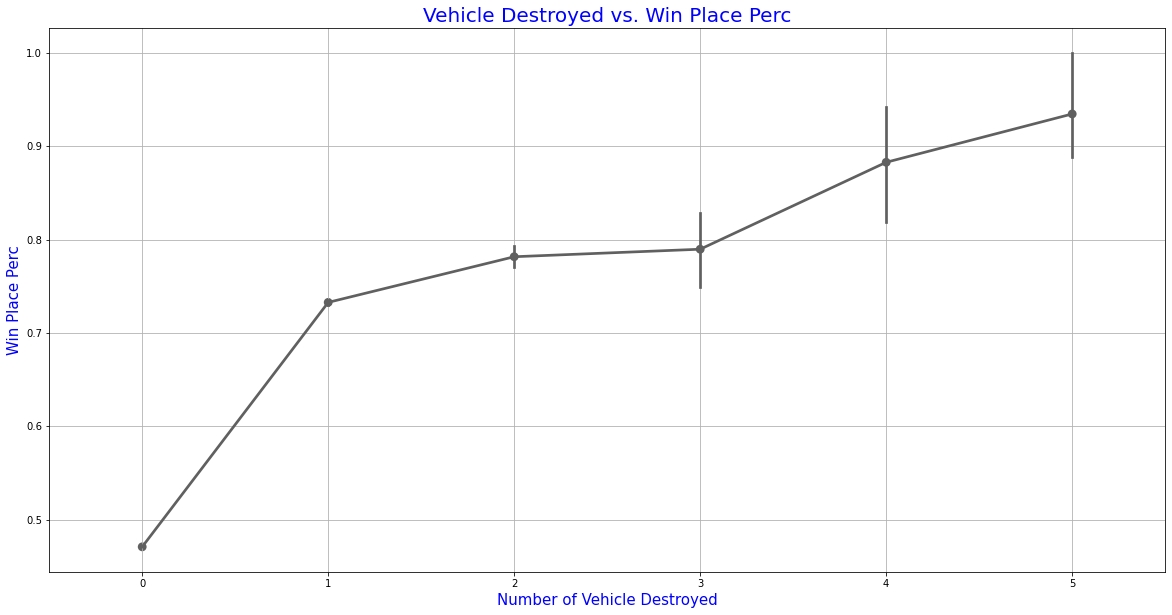

In [38]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=df_new,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroyed',fontsize = 15,color='blue')
plt.ylabel('Win Place Perc',fontsize = 15,color='blue')
plt.title('Vehicle Destroyed vs. Win Place Perc',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [39]:
print("The average person swims {:.1f}m, 1% of people have swam {}m or more, while the most miles ever swam is {}m.".format(df_new['swimDistance'].mean(),df_new['swimDistance'].quantile(0.99), df_new['swimDistance'].max()))

The average person swims 4.5m, 1% of people have swam 123.0m or more, while the most miles ever swam is 3823.0m.


/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


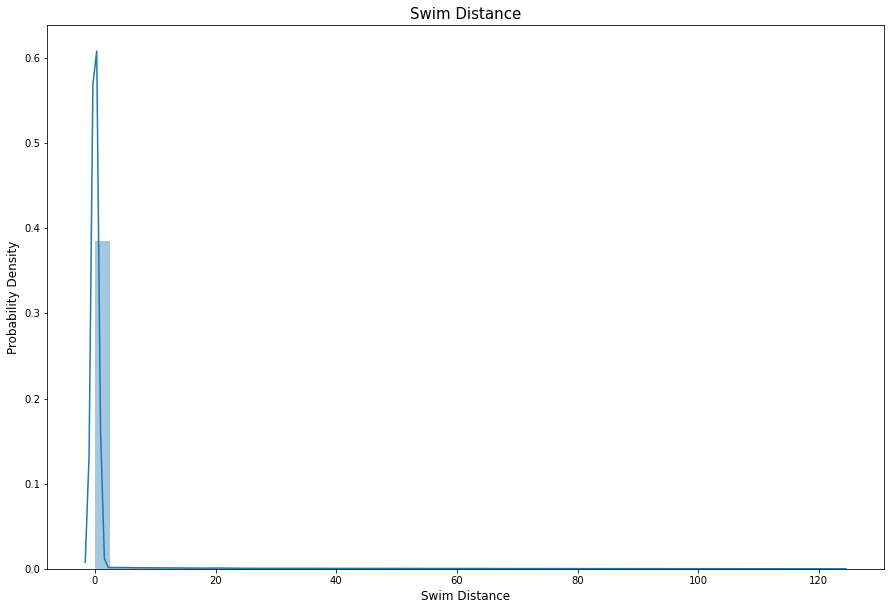

In [40]:
data = df_new.copy()
data = data[data['swimDistance'] < data['swimDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Swim Distance",fontsize=15)
sns.distplot(data['swimDistance'])
plt.xlabel('Swim Distance', fontsize='large')
plt.ylabel('Probability Density', fontsize='large')
plt.show()

In [41]:
print("{} players ({:.4f}%) swam 0 meters. This means they either weren't close to water or avoided water.".format(len(data[data['rideDistance'] == 0]), 100*len(data[data['swimDistance']==0])/len(data)))

3287993 players (94.4396%) swam 0 meters. This means they either weren't close to water or avoided water.


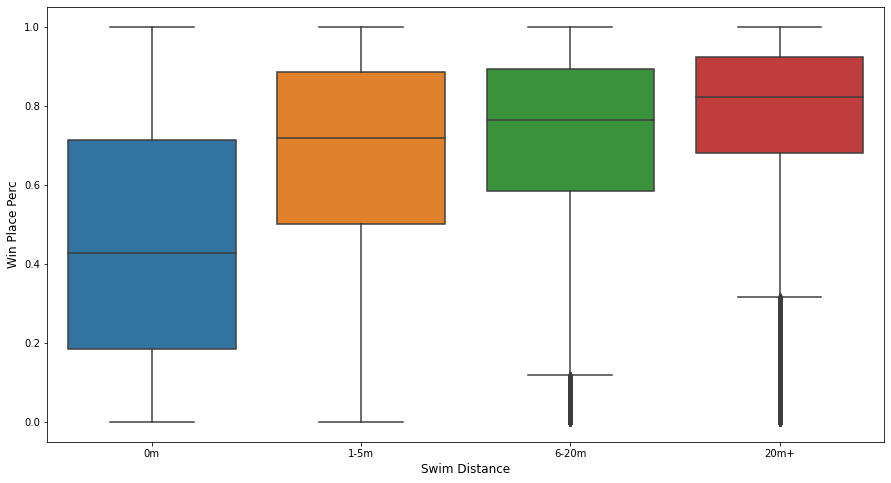

In [42]:
swim = df_new.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 3823], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.xlabel('Swim Distance', fontsize='large')
plt.ylabel('Win Place Perc', fontsize='large')
plt.show()

In [43]:
print("The average person uses {:.1f} heal items, 1% of people use {} or more, while the outlier was {}.".format(df_new['heals'].mean(), df_new['heals'].quantile(0.99), df_new['heals'].max()))
print("The average person uses {:.1f} boost items, 1% of people use {} or more, while the outlier[hacker] was {}.".format(df_new['boosts'].mean(), df_new['boosts'].quantile(0.99), df_new['boosts'].max()))

The average person uses 1.4 heal items, 1% of people use 12.0 or more, while the outlier was 80.
The average person uses 1.1 boost items, 1% of people use 7.0 or more, while the outlier[hacker] was 33.


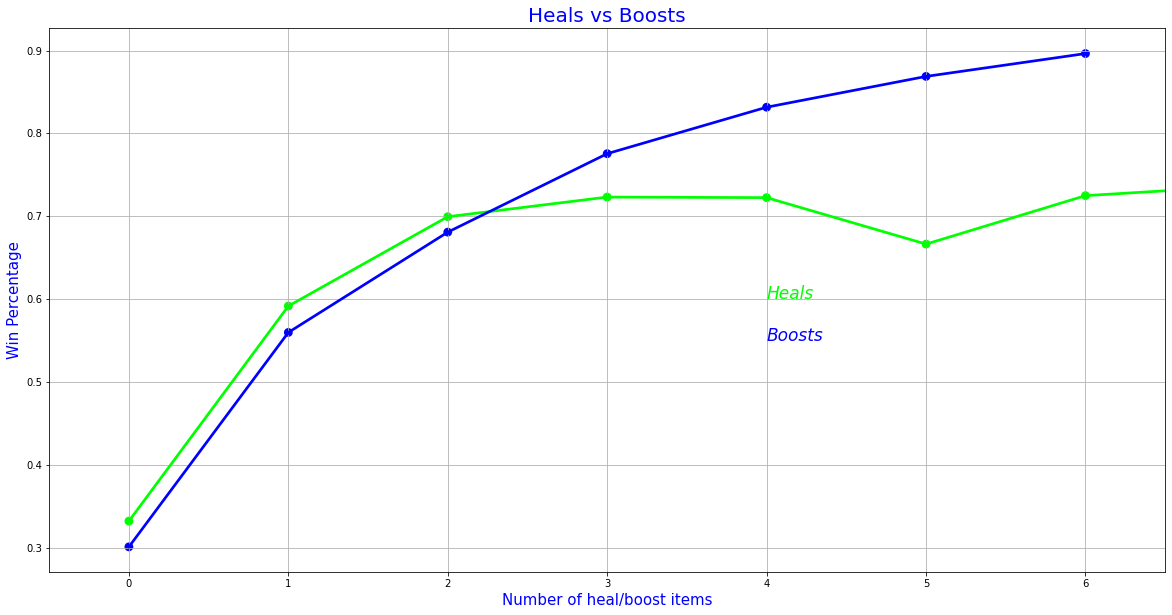

In [44]:
data = df_new.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

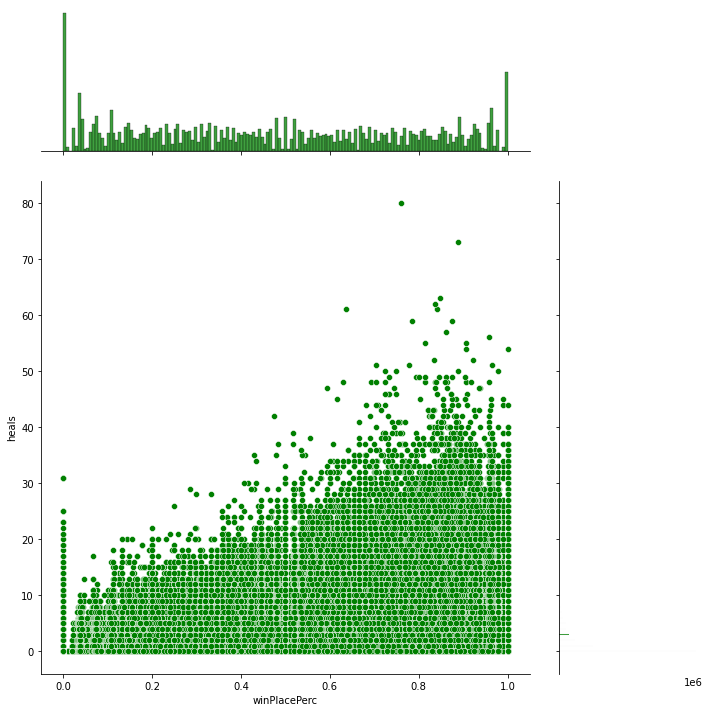

In [45]:
sns.jointplot(x="winPlacePerc", y="heals", data=df_new, height=10, ratio=3, color="g")
plt.show()

In [46]:
print('There appears to be a strong positive correlation between heals and win place')

There appears to be a strong positive correlation between heals and win place


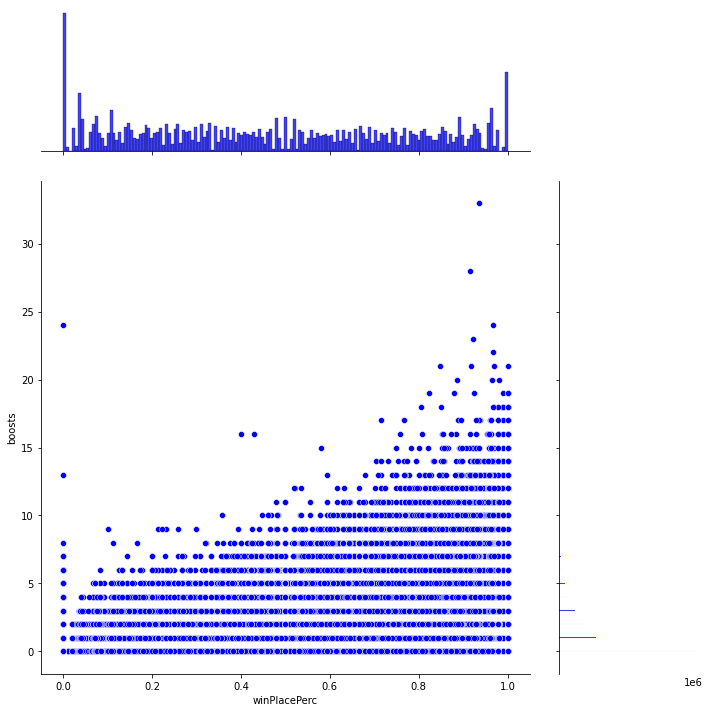

In [47]:
sns.jointplot(x="winPlacePerc", y="boosts", data=df_new, height=10, ratio=3, color="blue")
plt.show()

In [48]:
print('There appears to be a strong positive correlation between boosts and place place')

There appears to be a strong positive correlation between boosts and place place


In [49]:
solos = df_new[df_new['numGroups']>50]
duos = df_new[(df_new['numGroups']>25) & (df_new['numGroups']<=50)]
squads = df_new[df_new['numGroups']<=25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/len(df_new), len(duos), 100*len(duos)/len(df_new), len(squads), 100*len(squads)/len(df_new),))

There are 709111 (15.95%) solo games, 3295326 (74.10%) duo games and 442528 (9.95%) squad games.


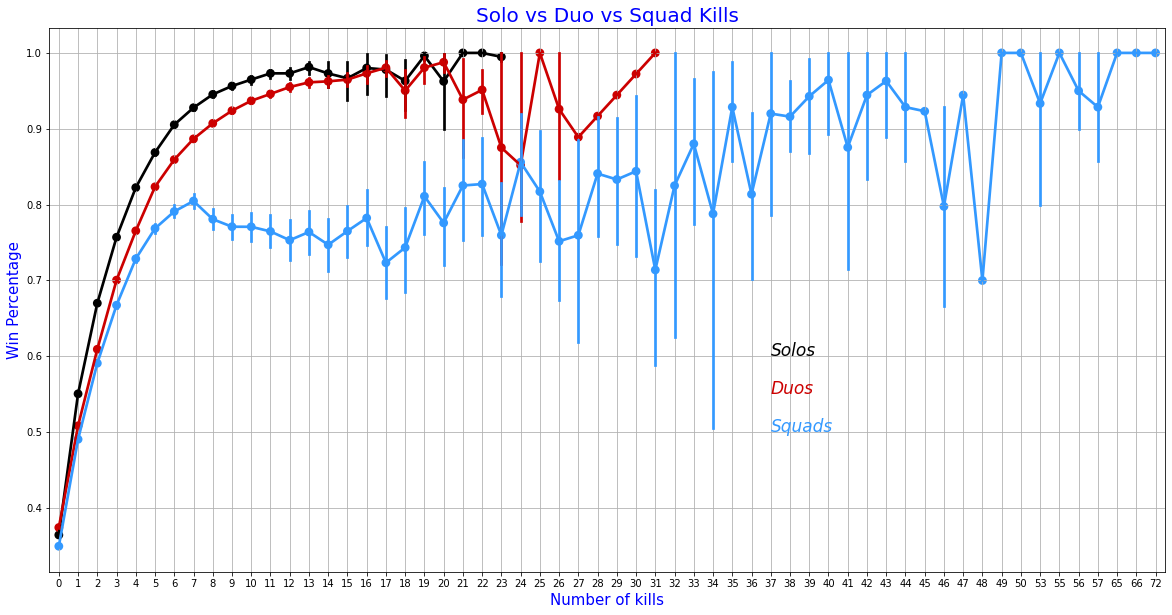

In [50]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [51]:
print('There appears to be more kills happening in Squad games vs solos and Duos. Comparatively more kill range values')

There appears to be more kills happening in Squad games vs solos and Duos. Comparatively more kill range values


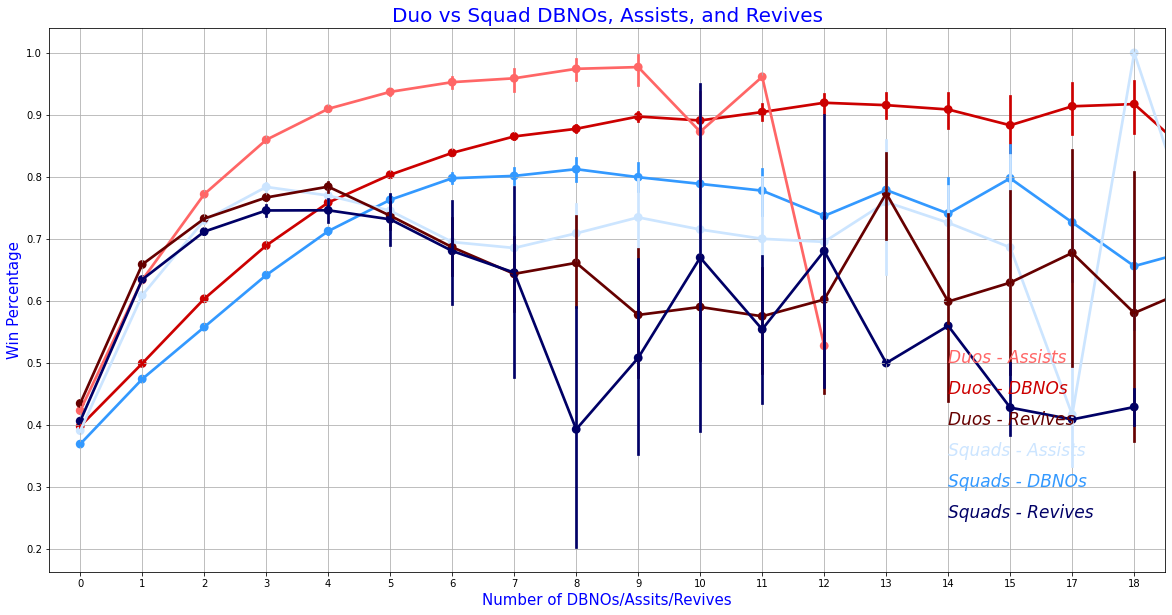

In [52]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='#FF6666',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='#CCE5FF',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='#660000',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='#000066',alpha=0.8)
plt.text(14,0.5,'Duos - Assists',color='#FF6666',fontsize = 17,style = 'italic')
plt.text(14,0.45,'Duos - DBNOs',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(14,0.4,'Duos - Revives',color='#660000',fontsize = 17,style = 'italic')
plt.text(14,0.35,'Squads - Assists',color='#CCE5FF',fontsize = 17,style = 'italic')
plt.text(14,0.3,'Squads - DBNOs',color='#3399FF',fontsize = 17,style = 'italic')
plt.text(14,0.25,'Squads - Revives',color='#000066',fontsize = 17,style = 'italic')
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [53]:
print('DBNOs, Assists and Revives have closer distributions comparing Duos vs Squads')

DBNOs, Assists and Revives have closer distributions comparing Duos vs Squads


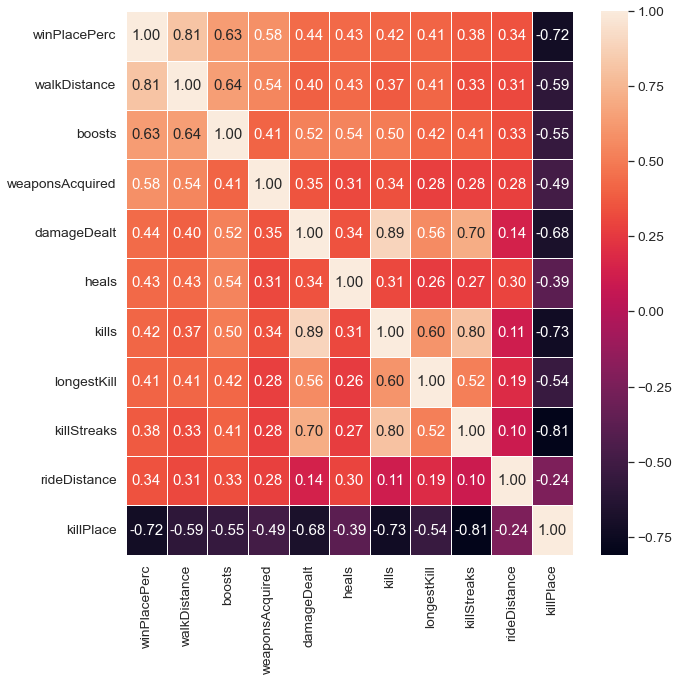

In [77]:
f,ax = plt.subplots(figsize=(10, 10))
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'heals', 'kills', 'longestKill', 'killStreaks', 'rideDistance', 'killPlace']
sns.heatmap(df_new[cols].corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.savefig('heatmap.png')
plt.show()

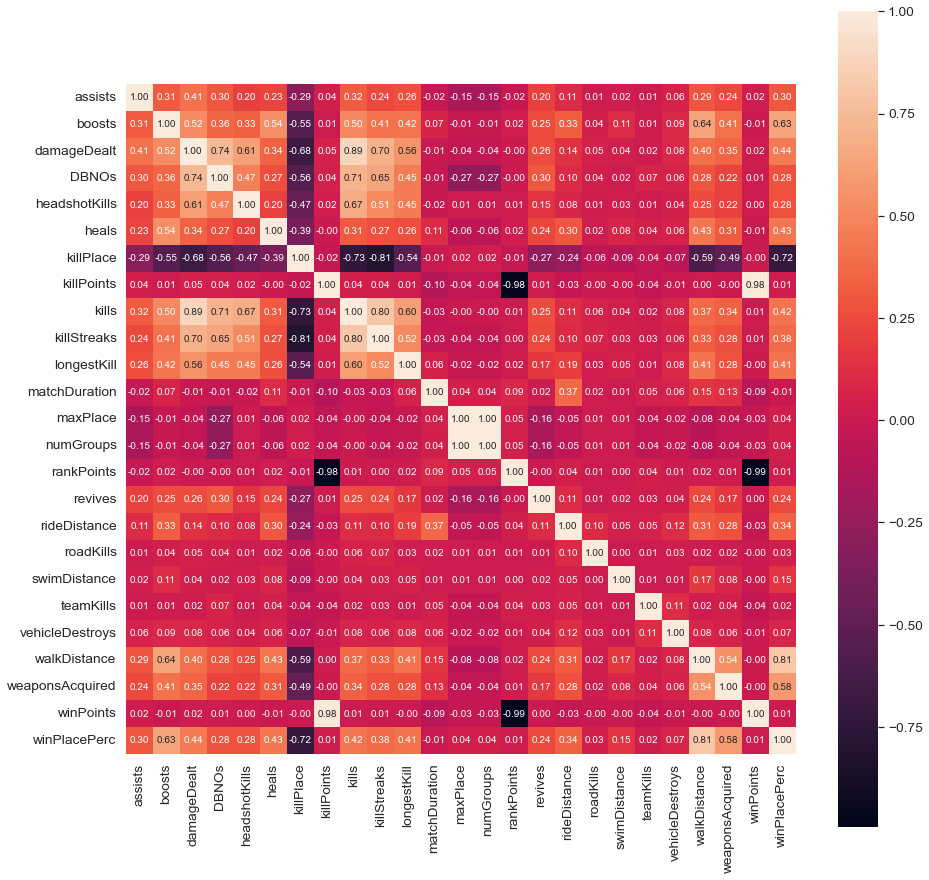

In [82]:
# k = 10 #number of variables for heatmap
f,ax = plt.subplots(figsize=(15, 15))
cols = df_new.corr()['winPlacePerc'].index
cm = np.corrcoef(df_new[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [55]:
print('Kill place and walk distance have the strongest correlation to win place perc with boosts and weapons acquired also having strong correlations as well')

Kill place and walk distance have the strongest correlation to win place perc with boosts and weapons acquired also having strong correlations as well


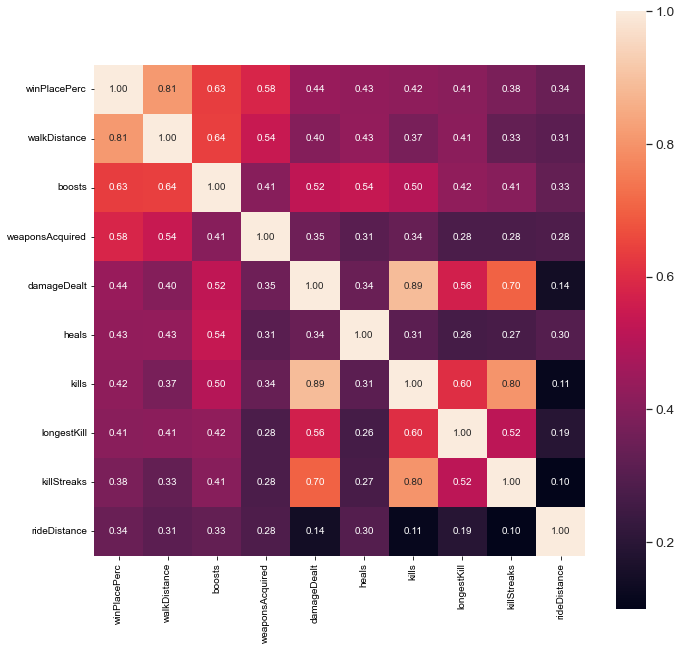

In [56]:
k = 10 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = df_new.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(df_new[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

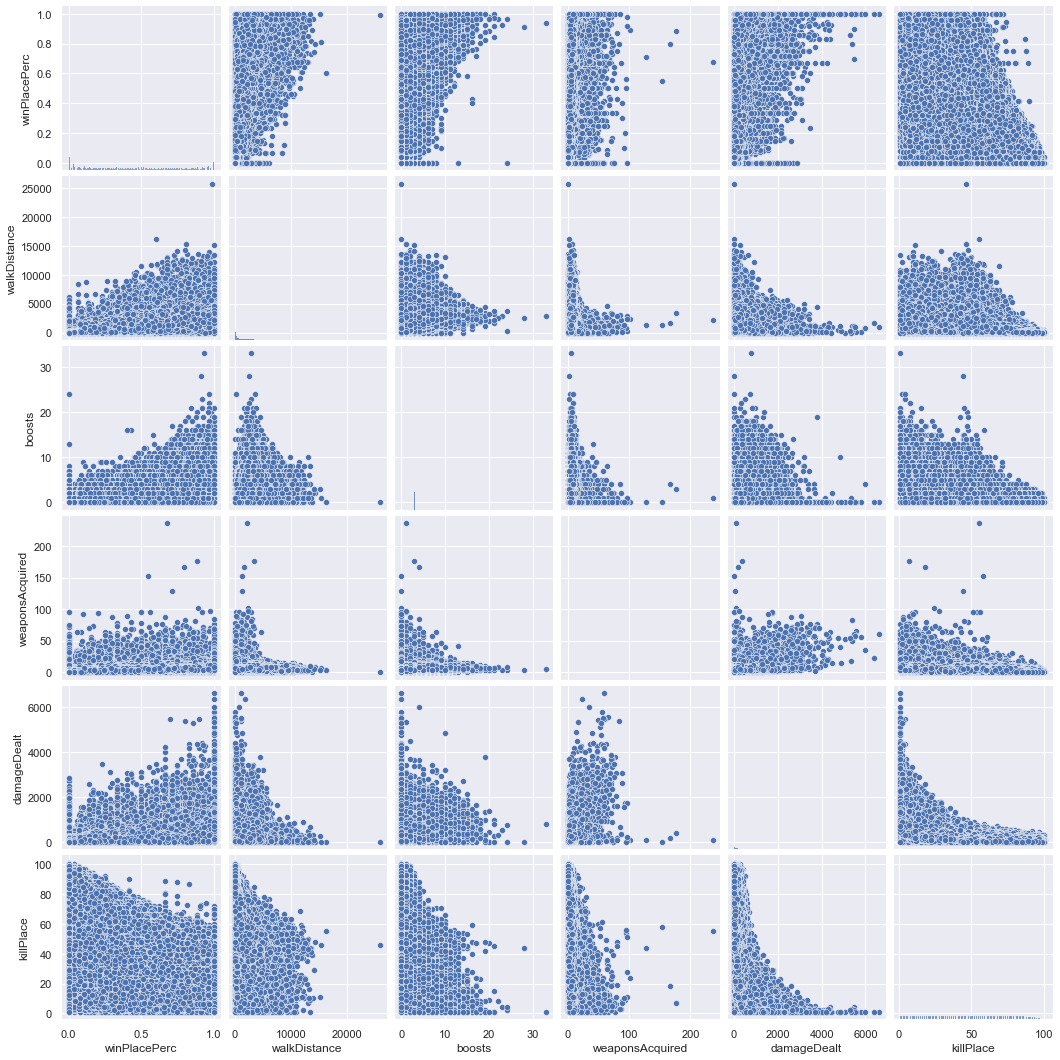

In [57]:
sns.set()
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace']
# cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'heals', 'kills', 'longestKill', 'killStreaks', 'rideDistance', 'killPlace']
sns.pairplot(df_new[cols], height = 2.5)
plt.show()

In [58]:
df_new.to_pickle('train.pkl')